# Creating a model for predicting Heart Diesease Using 
# Logistic Regression

#### Preprocessing the data

In [1]:
#Importing necessary modules

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing dataset

data = pd.read_csv(r"F:\Datasets\heart.csv")

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
pd.isnull(data).sum() #Shows the number of missing values # pd.isnull(data.all())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
X = data.drop("HeartDisease", axis="columns")
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [6]:
#Creating dummy variables for the columns which has distinct values.

dummy1 = pd.get_dummies(data["Sex"])
dummy2 = pd.get_dummies(data["ChestPainType"])
dummy3 = pd.get_dummies(data['RestingECG'])
dummy4 = pd.get_dummies(data['ExerciseAngina'])
dummy5 = pd.get_dummies(data['ST_Slope'])
merged_data = pd.concat([data,dummy1,dummy2,dummy3,dummy4,dummy5], axis='columns')
merged_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,...,0,0,0,1,0,1,0,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,...,1,0,0,1,0,1,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,...,0,0,0,0,1,1,0,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,...,0,0,0,1,0,0,1,0,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,...,1,0,0,1,0,1,0,0,0,1


In [7]:
# Dropping the columns for which dummy variable created.
# Dropping the one column in each dummy DataFrame to avoid dummy variable trap. 

final_data = merged_data.drop(["Sex","ChestPainType",'RestingECG','ExerciseAngina','ST_Slope','F','N','ATA','Up'], axis='columns')

In [8]:
X = final_data

#### Final Datasets

In [9]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,M,ASY,NAP,TA,LVH,Normal,ST,Y,Down,Flat
0,40,140,289,0,172,0.0,0,1,0,0,0,0,1,0,0,0,0
1,49,160,180,0,156,1.0,1,0,0,1,0,0,1,0,0,0,1
2,37,130,283,0,98,0.0,0,1,0,0,0,0,0,1,0,0,0
3,48,138,214,0,108,1.5,1,0,1,0,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,0,1,0,0,0,1
914,68,144,193,1,141,3.4,1,1,1,0,0,0,1,0,0,0,1
915,57,130,131,0,115,1.2,1,1,1,0,0,0,1,0,1,0,1
916,57,130,236,0,174,0.0,1,0,0,0,0,1,0,0,0,0,1


In [10]:
y = data.HeartDisease

In [11]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

### Creating a model for prediction

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [13]:
#Split the dataset for training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y) 

In [14]:
model = LogisticRegression()

In [15]:
model.fit(X_train,y_train)

C:\Users\Damo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
#Model performance

model.score(X_test,y_test)

1.0

In [17]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

#### Visualization of prediction

In [18]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[103,   0],
       [  0, 127]], dtype=int64)

Text(-3.0, 0.5, 'Truth')

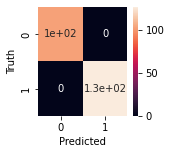

In [19]:
import seaborn as sb
plt.figure(figsize =(2,2))
sb.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")